Импорт библиотек

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
from math import pi
import squarify


Загрузка датасета

In [5]:
df = pd.read_csv("StudentsPerformance.csv")
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

DENSITY

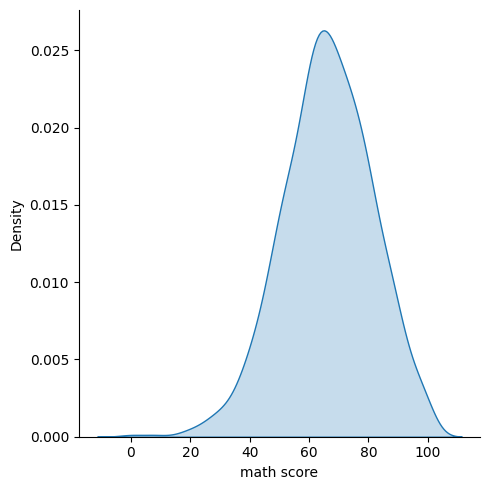

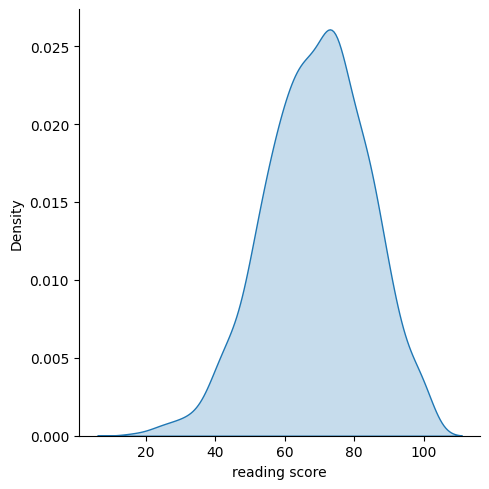

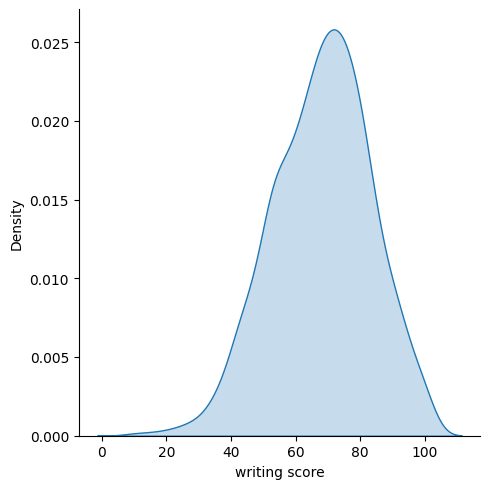

In [30]:
p = sns.displot(df, x="math score", kind="kde", fill=True)

p = sns.displot(df, x="reading score", kind="kde", fill=True)

p = sns.displot(df, x="writing score", kind="kde", fill=True)

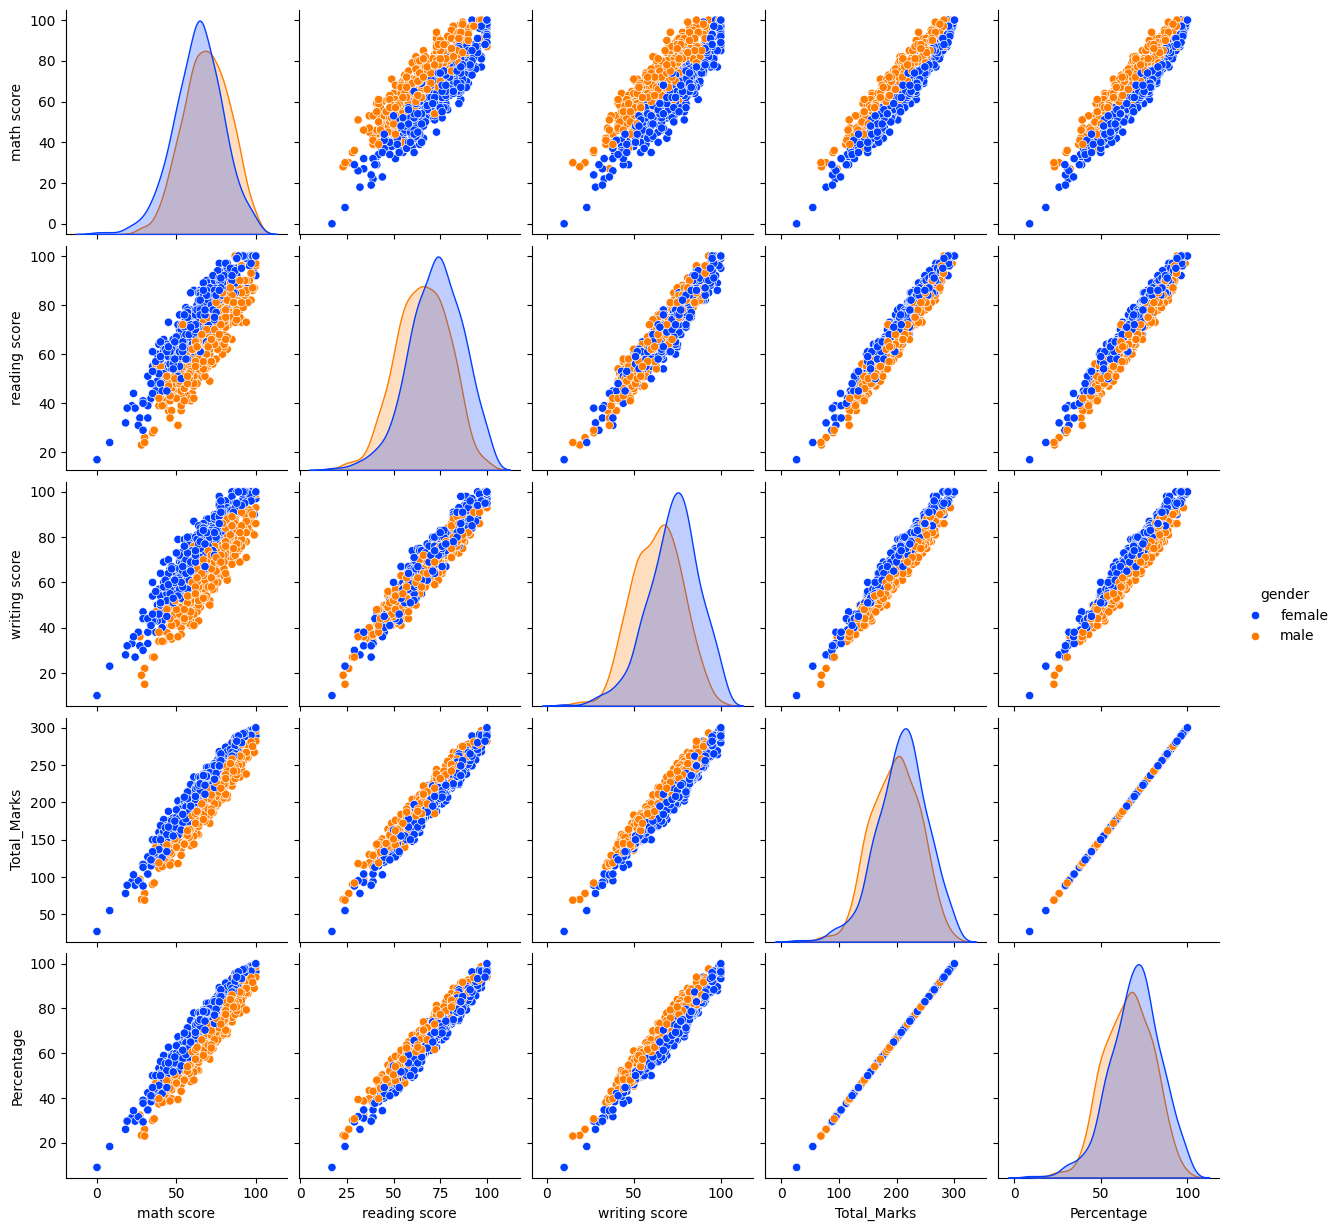

In [31]:
p = sns.pairplot(df, hue="gender", palette="bright")

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\2662061580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="race/ethnicity", data = df, palette="muted")


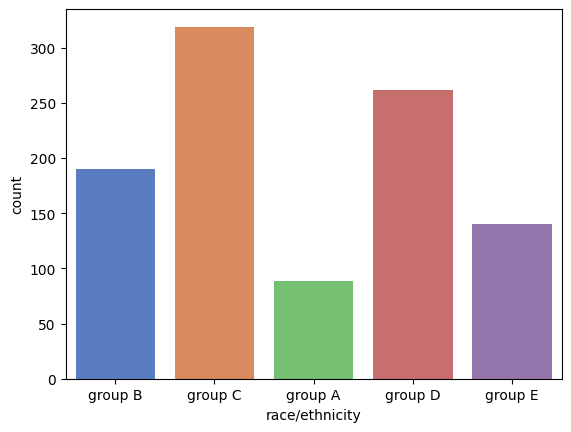

In [33]:
p = sns.countplot(x="race/ethnicity", data = df, palette="muted")

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\3781548851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="lunch", data = df, palette="muted")


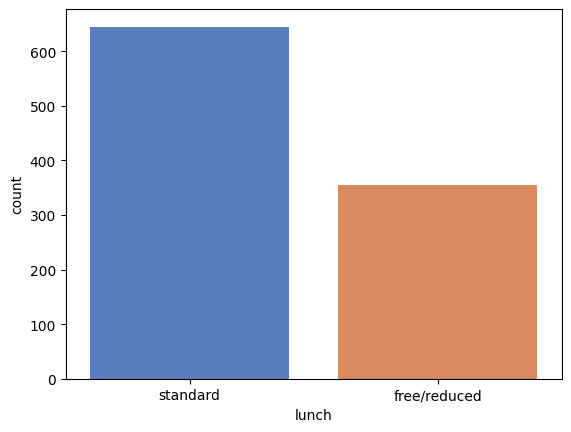

In [34]:
p = sns.countplot(x="lunch", data = df, palette="muted")

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\305923387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="test preparation course", data = df, palette="muted")


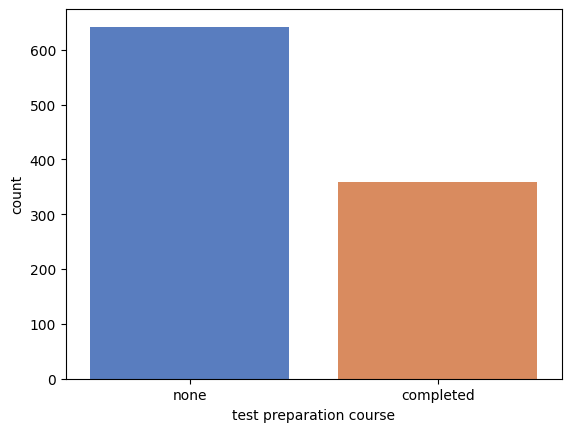

In [35]:
p = sns.countplot(x="test preparation course", data = df, palette="muted")

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\1023825716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="math score", data = df, palette="muted")


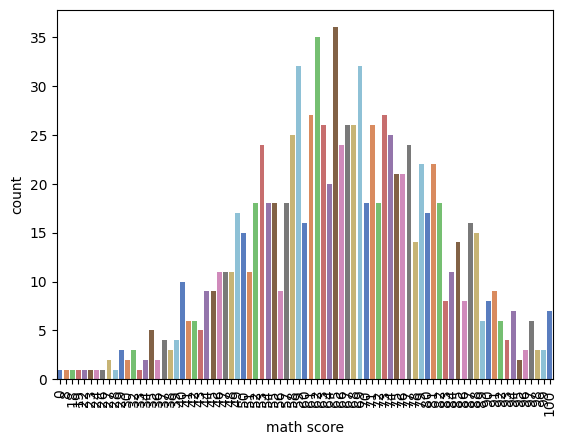

In [9]:

p = sns.countplot(x="math score", data = df, palette="muted")

In [14]:
passmark = 60
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'Fail', 'Pass')
df.Math_PassStatus.value_counts()

Math_PassStatus
Pass    677
Fail    323
Name: count, dtype: int64

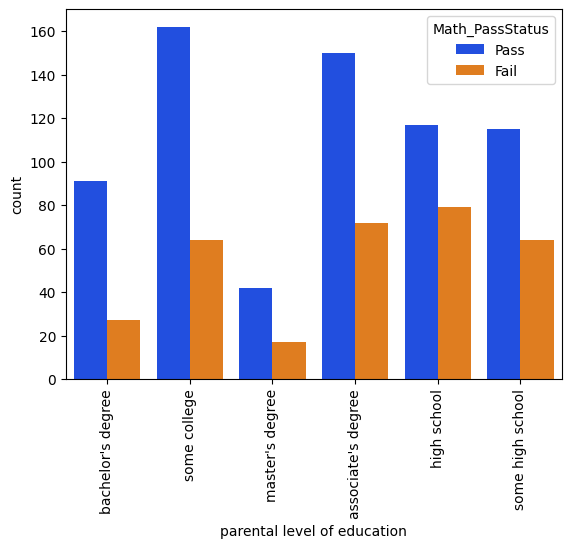

In [17]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\1024150484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="Percentage", data = df, palette="muted")


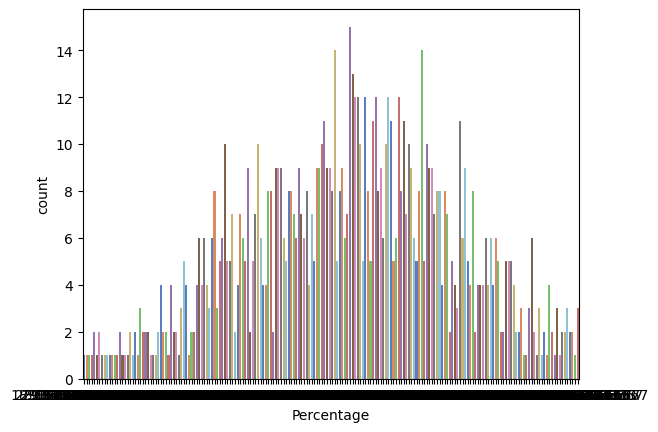

In [18]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [22]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'Fail', 'Pass')
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'Fail', 'Pass')

df['OverAll_PassStatus'] = df.apply(lambda x : 'Fail' if x['Math_PassStatus'] == 'Fail' or 
                                    x['Reading_PassStatus'] == 'Fail' or x['Writing_PassStatus'] == 'Fail' else 'Pass', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
Pass    603
Fail    397
Name: count, dtype: int64

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\1239282655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="OverAll_PassStatus", data = df, order=['Pass','Fail'],  palette="muted")


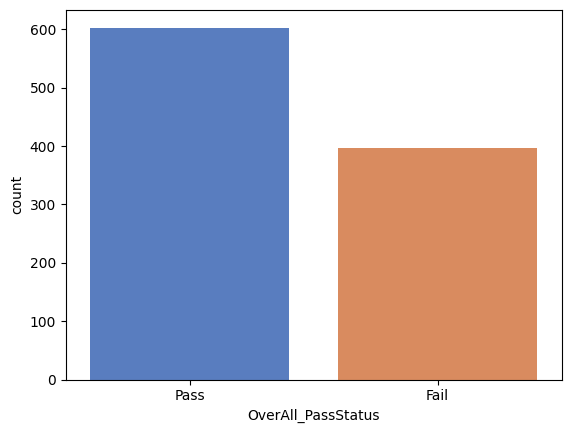

In [26]:
sns.countplot(x="OverAll_PassStatus", data = df, order=['Pass','Fail'],  palette="muted")
plt.show()

In [23]:


def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'неуд'):
        return 'неуд'    
    if ( Percentage >= 85 ):
        return 'отл'
    if ( Percentage >= 70):
        return 'хор'
    if ( Percentage >= 60):
        return 'удовл'
    else: 
        return 'неуд'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
хор      343
неуд     285
удовл    256
отл      116
Name: count, dtype: int64

C:\Users\kravtandr\AppData\Local\Temp\ipykernel_10440\3962153730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data = df, order=['отл','хор','удовл','неуд'],  palette="muted")


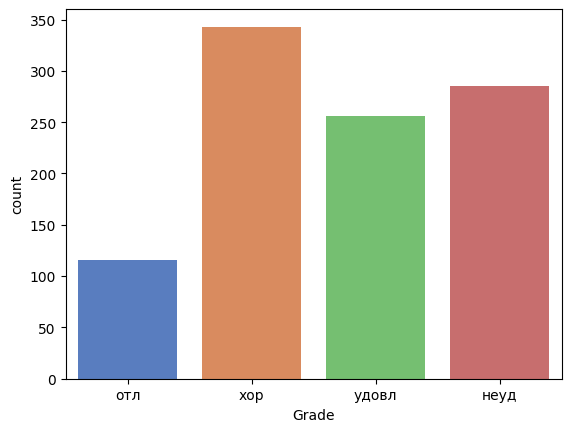

In [25]:
sns.countplot(x="Grade", data = df, order=['отл','хор','удовл','неуд'],  palette="muted")
plt.show()

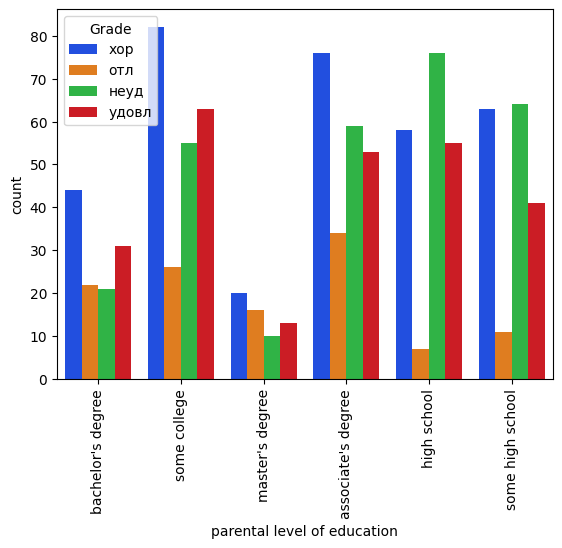

In [27]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

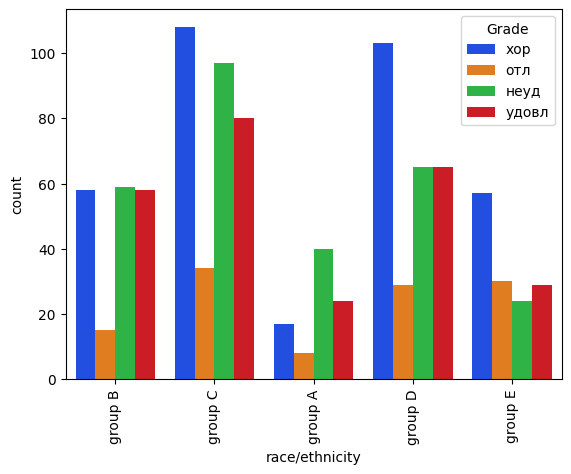

In [36]:
p = sns.countplot(x='race/ethnicity', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

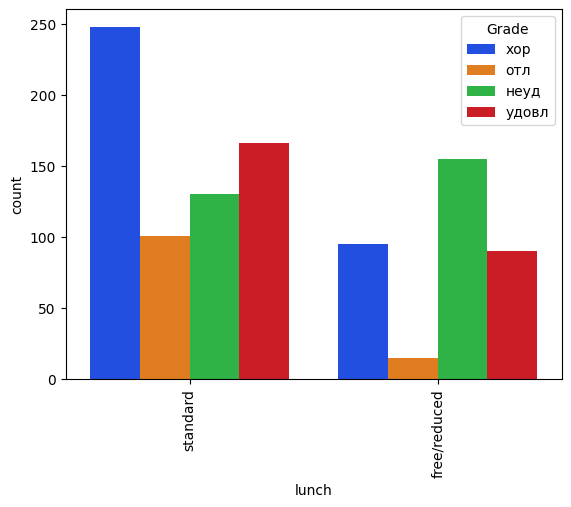

In [37]:
p = sns.countplot(x='lunch', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)